<a href="https://colab.research.google.com/github/cassio-carvalho/decifrando-sentimentos/blob/main/decifrando_sentimentos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

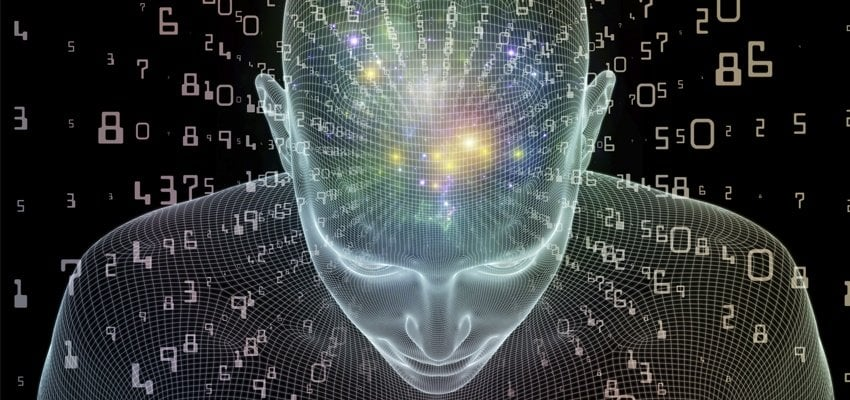

#**Decifrando Sentimentos: Identificando Canais com Vibrações Positivas para Publicidade Impactante.**


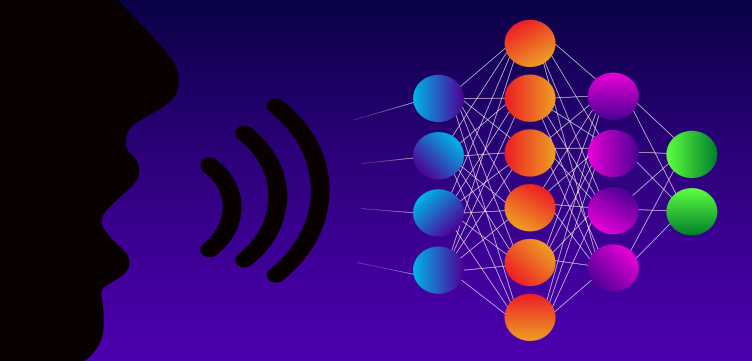

#**Introdução**
##No universo digital, em que a opinião pública é amplamente moldada por influenciadores online, torna-se essencial para as marcas identificar canais que transmitam sentimentos positivos.

##A ferramenta "Decifrando Sentimentos" utiliza avançadas técnicas de **Machine Learning, NLP (Processamento de Linguagem Natural) e Data Science** para oferecer uma abordagem analítica e estratégica. Isso permite às marcas detectar com precisão esses canais favoráveis e maximizar o impacto de suas campanhas publicitárias.

influencer.avif

#**Contexto**

##**A creators economy pode se aproximar de meio trilhão de dólares até 2027**
###O mercado poderá dobrar de tamanho nos próximos cinco anos, alcançando US$ **480 bilhõe**s até 2027, partindo dos US **250 bilhões** atuais.

##Quais são as principais formas que os produtores de conteúdo entrevistados em [uma pesquisa recente](https://influencermarketinghub.com/creator-earnings-benchmark-report/) fazem dinheiro:

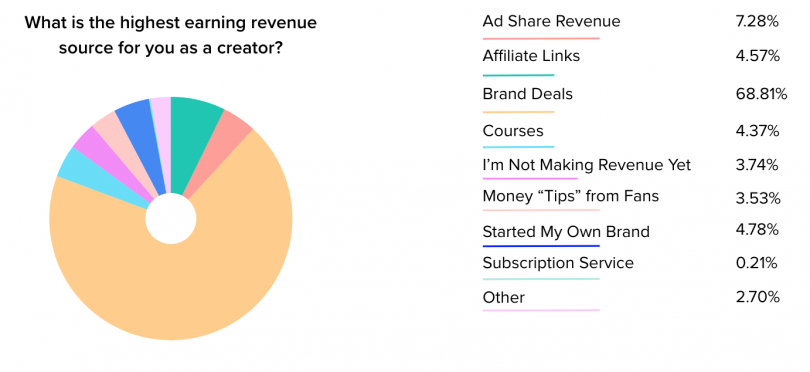

##Quais as plataformas favoritas dos criadores de conteúdo?

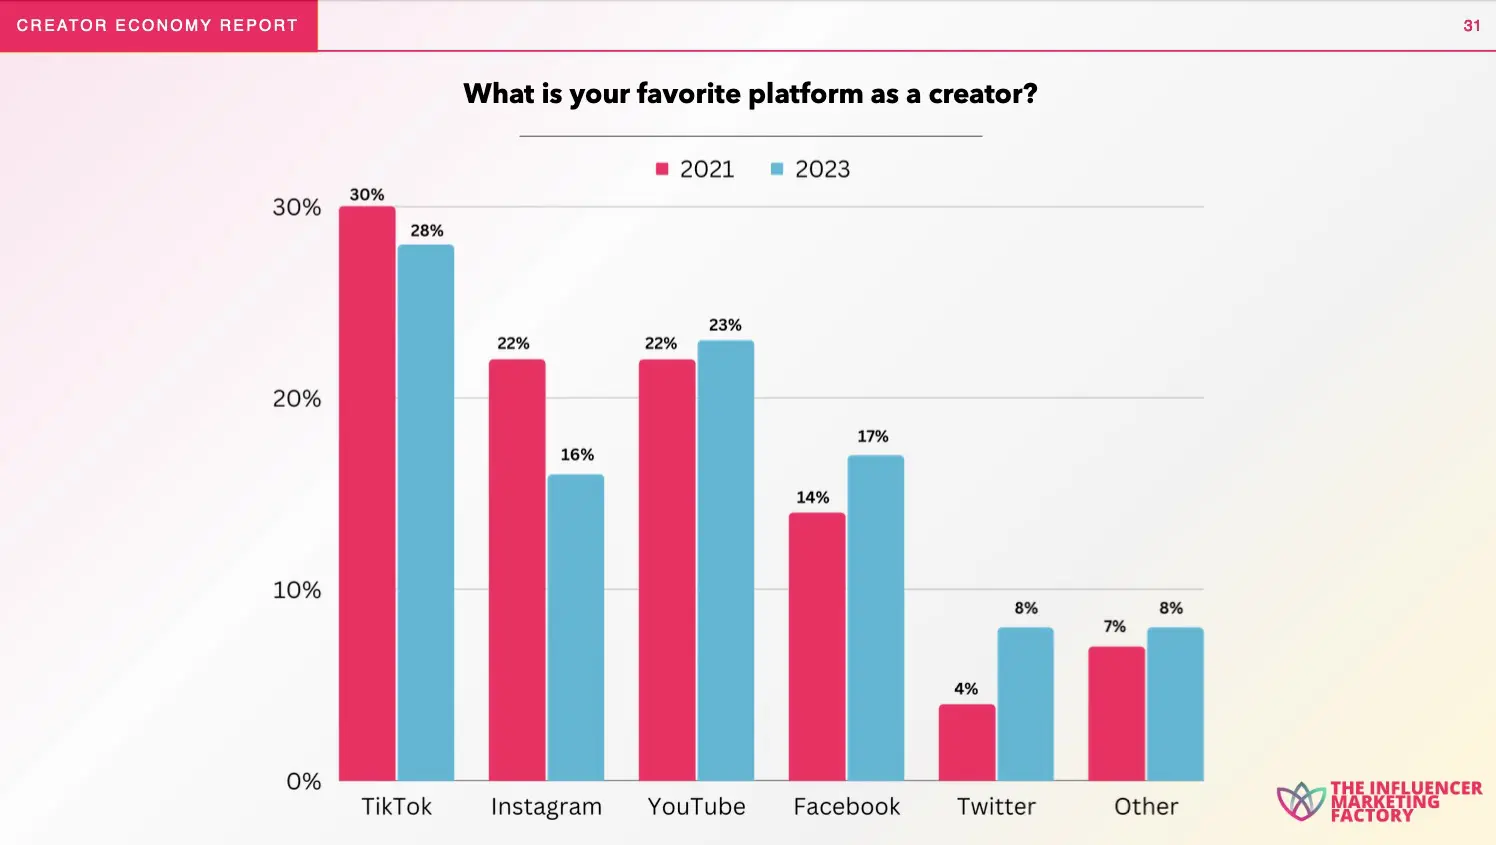

#**O Problema:**

portrait-man-cancelled-sign-protest-censorship-bullying-studio-isolated-white-background-overlay-face-cancel-culture-crowd-ban-influencer-social-media-mockup-space_590464-224339.avif


###No mundo digital atual, as marcas estão constantemente buscando maneiras inovadoras de se conectar com seu público-alvo. Uma das estratégias mais populares é a parceria com influenciadores digitais, que possuem uma vasta base de seguidores e podem ampliar o alcance de uma campanha de marketing de forma significativa. No entanto, essa estratégia não está isenta de riscos.




###Quando uma marca decide **associar sua imagem a um influenciador**, ela também se **associa a tudo o que esse influenciador representa**, incluindo suas opiniões, comportamentos e controvérsias passadas e presentes. Se o influenciador se envolve em uma controvérsia ou toma uma atitude que não é bem vista pelo público, a marca pode sofrer as consequências dessa associação.

##**O Custo de Ignorar o Sentimento nas Redes Sociais: Caso Felipe Neto e Bis**

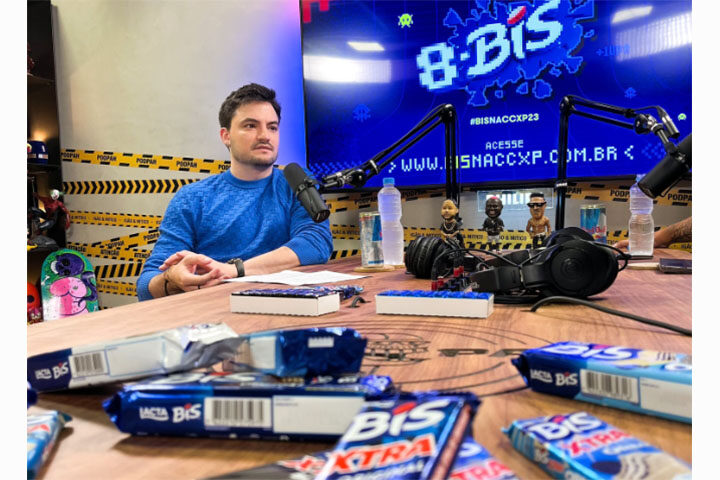

###Um exemplo emblemático desse risco é o caso entre a marca de chocolates "Bis" e o influenciador "Felipe Neto". Após a marca decidir patrocinar o influenciador, uma parcela significativa do público expressou descontentamento com a associação, levando a um movimento de boicote à marca. Muitos consumidores, por discordarem de opiniões e atitudes do influenciador, decidiram que não comprariam mais produtos da marca "Bis" enquanto ela mantivesse o patrocínio.

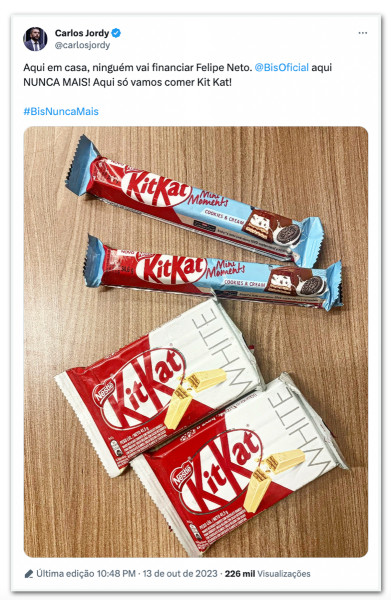

###Esse episódio ilustra os perigos potenciais de uma campanha mal planejada ou mal executada com influenciadores. As marcas podem enfrentar:




###1.   **Reputação Manchada:** A imagem da marca pode ser seriamente prejudicada, levando a uma perda de confiança por parte dos consumidores.
###2.   **Perda Financeira:** Boicotes e rejeição de produtos podem levar a quedas significativas nas vendas.
###3.   **Desconexão com o Público-alvo:** A marca pode se distanciar de seu público-alvo, perdendo sua relevância e conexão emocional.



###Portanto, é essencial que as marcas estejam cientes dos riscos e sejam meticulosas ao escolher com quem se associar. A análise do sentimento dos comentários e menções pode ser uma ferramenta valiosa nesse processo, ajudando as empresas a entenderem a percepção do público e a tomarem decisões mais acertivas.

#**A Solução:**
##**Ferramenta para análise do sentimento dos comentários e menções de marcas em vídeos no Youtube.**

###Como exemplo, compararemos o vídeo de entretenimento ["VOCÊ NUNCA VIU UMA PIZZA ASSIM"](https://www.youtube.com/watch?v=cWnra1270ss), patrocinado pelo **Guaraná Antartica** no canal **"Coisa Nossa"**, e o [vídeo resposta do **Felipe Neto**](https://www.youtube.com/watch?v=PJgD4zQSByM&ab_channel=FelipeNeto) sobre o "cancelamento" ocorrido após sua entrevista no podcast "Podpah", que foi patrocinado pelo chocolate Bis.

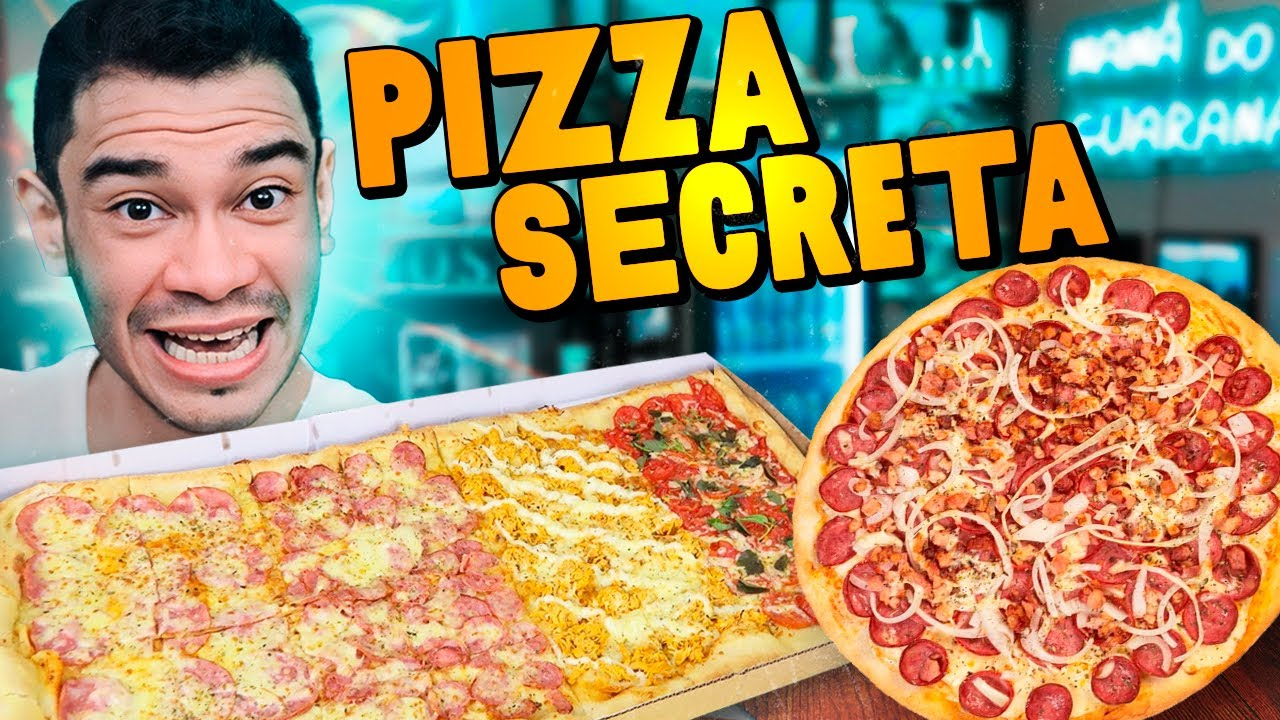

###Após a coleta de comentários dos vídeos no YouTube, empregamos algoritmos de Processamento de Linguagem Natural (NLP) para decifrar os sentimentos manifestados.
###*Devido à intensidade do processamento requerido, essa análise foi conduzida em um código separado.

###O processamento nos retorna uma coluna 'Sentiment' com o valor de "compound". A métrica compound varia entre -1 e 1, que pode ser interpretada da seguinte forma:

##**Valor > 0.05: Sentimento Positivo**
##**Valor entre -0.05 e 0.05: Sentimento Neutro**
##**Valor < -0.05: Sentimento Negativo**

###Essencialmente, a pontuação compound é uma métrica agregada que tenta dar uma ideia geral do sentimento expresso no texto. Ela é muito útil quando se quer uma única medida ao invés de três (positivo, neutro, negativo) para representar o sentimento de um texto.

In [ ]:
import numpy as np
import pandas as pd
import re

df1 = pd.read_csv("sentiment_comments_PIZZA_COISA_NOSSA_04-09-2023.csv")
df2 = pd.read_csv("sentiment_comments_O_FIM_DE_16-10-2023.csv")

# df1.head()
df1['Sentiment'].head()

0    {'neg': 0.244, 'neu': 0.489, 'pos': 0.266, 'co...
1    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
2    {'neg': 0.444, 'neu': 0.556, 'pos': 0.0, 'comp...
3    {'neg': 0.134, 'neu': 0.685, 'pos': 0.181, 'co...
4    {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...
Name: Sentiment, dtype: object

##**Vamos processar os dados recebidos para obter métricas mais precisas, indo além da simples contagem de curtidas ou comentários, a fim de avaliar o sucesso de uma campanha.**

Organizando os datasets:

Verificando nulos

In [ ]:
df1.isnull().sum()

channelId                  0
videoId                    0
textDisplay                0
textOriginal               0
authorDisplayName          0
authorProfileImageUrl      0
authorChannelUrl           0
authorChannelId            0
canRate                    0
viewerRating               0
likeCount                  0
publishedAt                0
updatedAt                  0
parentId                 306
commentId                  0
Sentiment                  0
dtype: int64

In [ ]:
types_in_sentiment = df1['Sentiment'].apply(type).value_counts()
print(types_in_sentiment)

<class 'str'>    353
Name: Sentiment, dtype: int64


In [ ]:
df2.isnull().sum()

channelId                   0
videoId                     3
textDisplay                 3
textOriginal                9
authorDisplayName           7
authorProfileImageUrl       7
authorChannelUrl            7
authorChannelId             7
canRate                     7
viewerRating                7
likeCount                   7
publishedAt                11
updatedAt                   7
parentId                 6754
commentId                  11
Sentiment                  11
dtype: int64

In [ ]:
types_in_sentiment = df2['Sentiment'].apply(type).value_counts()
print(types_in_sentiment)

<class 'str'>      7967
<class 'float'>      11
Name: Sentiment, dtype: int64


In [ ]:
# Filtrar o DataFrame para excluir linhas onde 'Sentiment' é do tipo float
df2 = df2[df2['Sentiment'].apply(type) != float]

In [ ]:
df2.isnull().sum()

channelId                   0
videoId                     0
textDisplay                 0
textOriginal                2
authorDisplayName           0
authorProfileImageUrl       0
authorChannelUrl            0
authorChannelId             0
canRate                     0
viewerRating                0
likeCount                   0
publishedAt                 0
updatedAt                   0
parentId                 6747
commentId                   0
Sentiment                   0
dtype: int64

In [ ]:
# Converter a coluna 'Sentiment' que está em formato de string para dicionário
df1['Sentiment'] = df1['Sentiment'].apply(eval)
df2['Sentiment'] = df2['Sentiment'].apply(eval)

# Expandir a coluna 'Sentiment' em várias colunas
sentiments1 = df1['Sentiment'].apply(pd.Series)
sentiments2 = df2['Sentiment'].apply(pd.Series)

# Renomear a coluna 'compound' para 'comp'
sentiments1 = sentiments1.rename(columns={'compound': 'comp'})
sentiments2 = sentiments2.rename(columns={'compound': 'comp'})

# Juntar as novas colunas ao dataset original
df1 = pd.concat([df1, sentiments1], axis=1)
df2 = pd.concat([df2, sentiments2], axis=1)

# Selecionar as colunas desejadas
df1_new = df1[['videoId', 'textDisplay', 'authorDisplayName', 'likeCount', 'neg', 'neu', 'pos', 'comp', 'publishedAt', 'updatedAt']]
df2_new = df2[['videoId', 'textDisplay', 'authorDisplayName', 'likeCount', 'neg', 'neu', 'pos', 'comp', 'publishedAt', 'updatedAt']]

# Adicionando a coluna ID
df1_new.insert(0, 'id', range(1, len(df1_new) + 1))
df2_new.insert(0, 'id', range(1, len(df2_new) + 1))

# Salvar o novo dataset como csv
df1_new.to_csv('new_sentiment_comments_PIZZA_COISA_NOSSA_04-09-2023', index=False)
df2_new.to_csv('new_sentiment_comments_O_FIM_DE_16-10-2023', index=False)

<ipython-input-76-35986b1eda73>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sentiments2 = df2['Sentiment'].apply(pd.Series)
<ipython-input-76-35986b1eda73>:7: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  sentiments2 = df2['Sentiment'].apply(pd.Series)


In [ ]:
df1_new.head()


,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt
0,1,cWnra1270ss,Quem nao acha graça no igor é muito mau amado ...,thamires frança,0,0.244,0.489,0.266,0.1489,2023-09-04T02:20:22Z,2023-09-04T02:20:22Z
1,2,cWnra1270ss,kkkkkkkkkkkkkkkkkkkkk,REINALDO BATISTA DA SILVA,0,0.000,1.000,0.000,0.0000,2023-08-29T13:27:57Z,2023-08-29T13:27:57Z
2,3,cWnra1270ss,Saudades Robertinho,Pali Ativa,0,0.444,0.556,0.000,-0.1531,2023-08-16T01:56:59Z,2023-08-16T01:56:59Z
3,4,cWnra1270ss,o Coisa Nossa precisa liberar os vídeos sem ce...,Bonyeck Louzeiro,0,0.134,0.685,0.181,0.1007,2023-08-16T00:42:03Z,2023-08-16T00:42:03Z
4,5,cWnra1270ss,"<a href=""http://www.youtube.com/results?search...",Nill Sousa,0,0.000,1.000,0.000,0.0000,2023-08-13T04:24:33Z,2023-08-13T04:24:33Z


In [ ]:
df2_new.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt
0,1,PJgD4zQSByM,"Felipe, essa questão de ódio é mútua, são extr...",Gavo Antunes,0,0.236,0.606,0.158,-0.9605,2023-10-16T18:58:48Z,2023-10-16T18:58:48Z
1,2,PJgD4zQSByM,Vc semeou o ódio que esta colhendo agora! Lide...,Thais Klems,0,0.347,0.653,0.000,-0.6988,2023-10-16T18:45:25Z,2023-10-16T18:45:25Z
2,3,PJgD4zQSByM,"Você não chamou os portugueses de genocida, po...",C. Filho,0,0.268,0.431,0.301,0.1779,2023-10-16T18:43:18Z,2023-10-16T18:43:18Z
3,4,PJgD4zQSByM,FAZ O B,WIL,0,0.000,1.000,0.000,0.0000,2023-10-16T18:42:34Z,2023-10-16T18:42:34Z
4,5,PJgD4zQSByM,"Fica tranquilo Filipinho,nós somos a minoria,t...",Silvana Cervera,0,0.113,0.688,0.199,-0.5119,2023-10-16T18:39:24Z,2023-10-16T18:40:32Z


Nulos:

In [ ]:
df1_new.isnull().sum()

id                   0
videoId              0
textDisplay          0
authorDisplayName    0
likeCount            0
neg                  0
neu                  0
pos                  0
comp                 0
publishedAt          0
updatedAt            0
dtype: int64

In [ ]:
df2_new.isnull().sum()

id                   0
videoId              0
textDisplay          0
authorDisplayName    0
likeCount            0
neg                  2
neu                  2
pos                  2
comp                 2
publishedAt          0
updatedAt            0
dtype: int64

In [ ]:
# Removendo nulos
df2_new = df2_new.dropna()

In [ ]:
df2_new.isnull().sum()

id                   0
videoId              0
textDisplay          0
authorDisplayName    0
likeCount            0
neg                  0
neu                  0
pos                  0
comp                 0
publishedAt          0
updatedAt            0
dtype: int64

Filtrando comentários positivos e negativos:

In [ ]:
df1_new = df1_new[df1_new['comp'] != 0]
df2_new = df2_new[df2_new['comp'] != 0]

Características dos datasets:

In [ ]:
df1_new.comp.describe()

count    210.000000
mean       0.359028
std        0.501430
min       -0.938200
25%       -0.045150
50%        0.493300
75%        0.755125
max        0.986300
Name: comp, dtype: float64

In [ ]:
df2_new.comp.describe()

count    5276.000000
mean       -0.162640
std         0.533064
min        -0.995000
25%        -0.598650
50%        -0.296000
75%         0.312075
max         0.990200
Name: comp, dtype: float64

Mediana:

In [ ]:
np.median(df1_new.comp)

0.4933

In [ ]:
np.median(df2_new.comp)

-0.296

Visualização:

In [ ]:
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Dataframe 1')

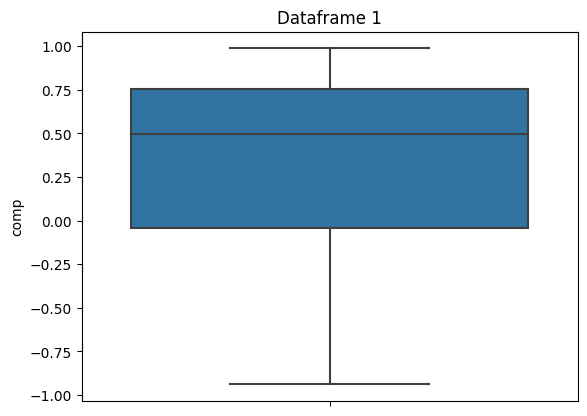

In [ ]:
sns.boxplot(y=df1_new.comp)

plt.title("Dataframe 1")

Text(0.5, 1.0, 'Dataframe 2')

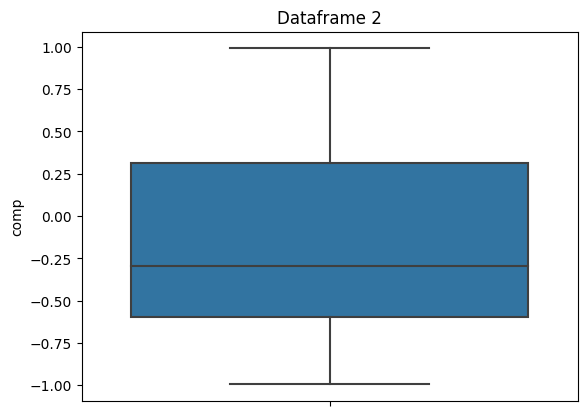

In [ ]:
sns.boxplot(y=df2_new.comp)

plt.title("Dataframe 2")

Text(0.5, 1.0, 'Dataframe 1')

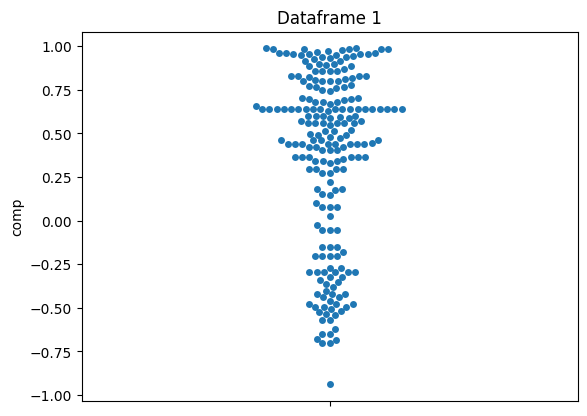

In [ ]:
sns.swarmplot(df1_new.comp, orient="v")

plt.title("Dataframe 1")

Text(0.5, 1.0, 'Dataframe 2')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


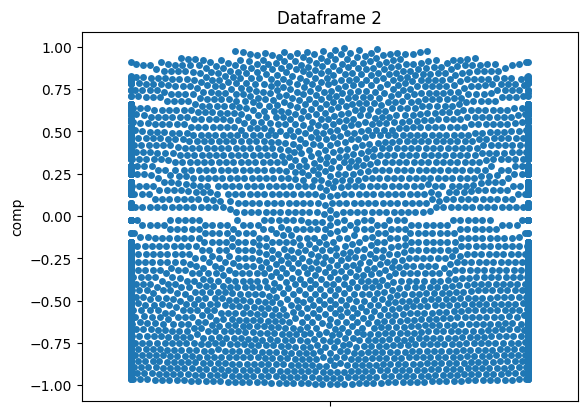

In [ ]:
sns.swarmplot(df2_new.comp, orient="v")

plt.title("Dataframe 2")

Text(0.5, 1.0, 'Dataframe 1')

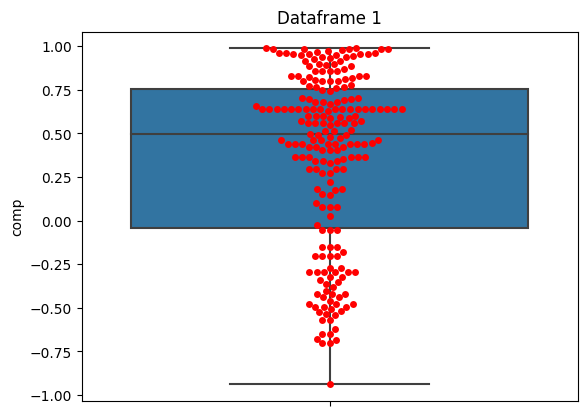

In [ ]:
sns.swarmplot(df1_new.comp, orient="v", color="red")
sns.boxplot(y=df1_new.comp, orient="v")

plt.title("Dataframe 1")

Text(0.5, 1.0, 'Dataframe 2')

/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3544: UserWarning: 52.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


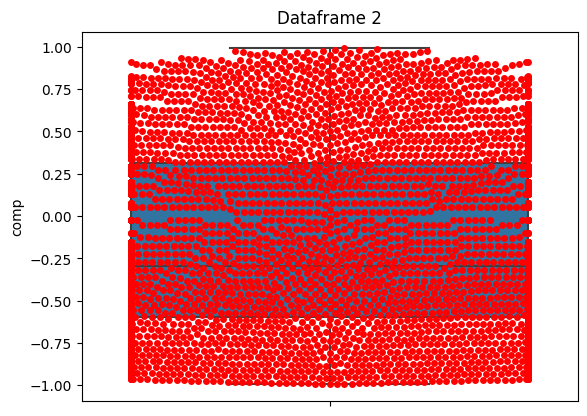

In [ ]:
sns.swarmplot(df2_new.comp, orient="v", color="red")
sns.boxplot(y=df2_new.comp, orient="v")

plt.title("Dataframe 2")

##Criando uma nova coluna "rating", que insere as seguintes notas para os sentimentos nos comentários:

##**A-** Muito Positivo
##**B-** Positivo
##**C-** Negativo
##**D-** Muito Negativo

In [ ]:
def classify_sentiment(value):
    if value > 0.7:
        return 'A'  # Muito Positivo
    elif value > 0.05:
        return 'B'  # Positivo
    elif value >= -0.05:
        return 'C'  # Negativo
    else:
        return 'D'  # Muito Negativo

df1_new['rating'] = df1_new['comp'].apply(classify_sentiment)
df2_new['rating'] = df2_new['comp'].apply(classify_sentiment)

Visualizando a distribuição dos sentimentos nos comentários:

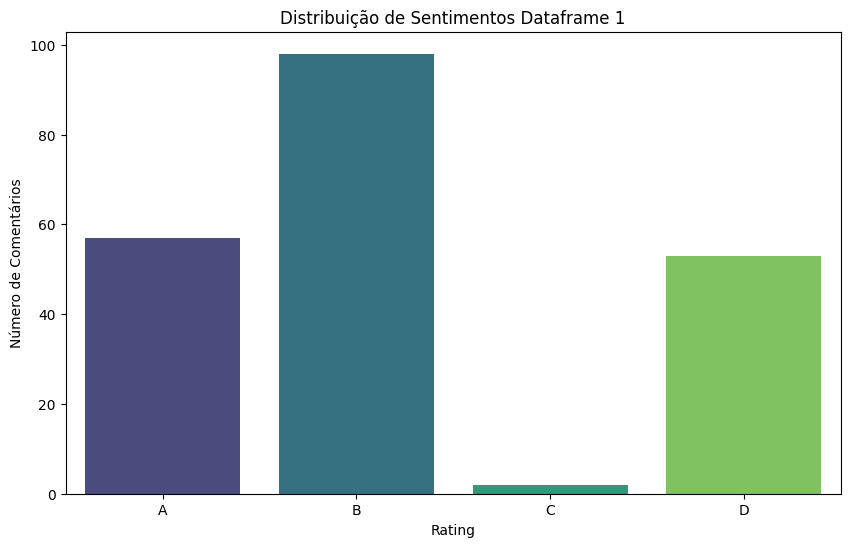

In [ ]:
# Contar a frequência de cada rating
rating_counts = df1_new['rating'].value_counts()

# Plotar um gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, order=["A", "B", "C", "D"], palette="viridis")

plt.title("Distribuição de Sentimentos Dataframe 1")
plt.xlabel("Rating")
plt.ylabel("Número de Comentários")
plt.show()

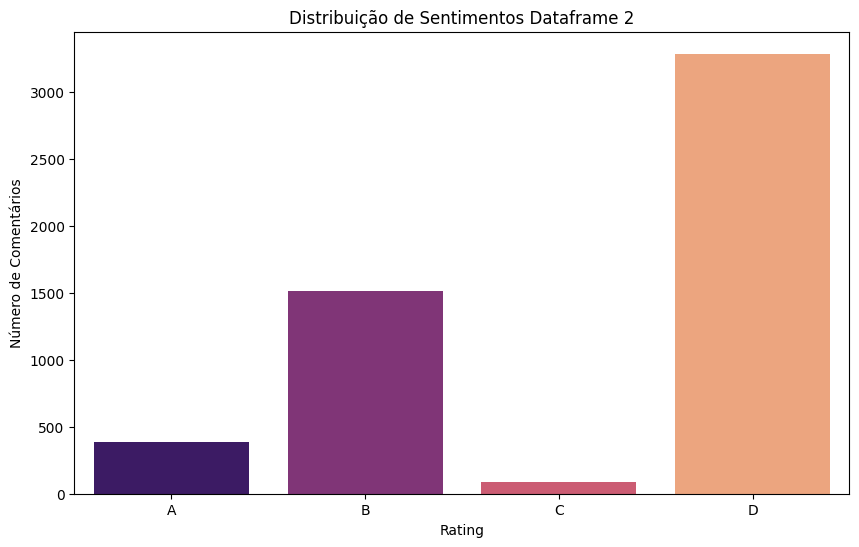

In [ ]:
rating_counts = df2_new['rating'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=rating_counts.index, y=rating_counts.values, order=["A", "B", "C", "D"], palette="magma")

plt.title("Distribuição de Sentimentos Dataframe 2")
plt.xlabel("Rating")
plt.ylabel("Número de Comentários")
plt.show()

##**Checando comentários Muito Negativos (D):**

In [ ]:
df1_d = df1_new.loc[df1_new['rating'] == 'D']
df1_d = df1_d.sort_values(by='comp', ascending=True)

df1_d.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
293,294,cWnra1270ss,KD O ROBERTINHOOOOOO ? 😭😭😭😭😭,EDSIMON005,4,0.544,0.456,0.000,-0.9382,2023-07-14T22:47:42Z,2023-07-14T22:47:42Z,D
226,227,cWnra1270ss,o segredo tava esse tempo todo na thumb 😱,milhodas k,0,0.367,0.633,0.000,-0.7003,2023-07-15T00:38:32Z,2023-07-15T00:38:32Z,D
329,330,cWnra1270ss,O pessoal passa o dia observando a futil vida ...,KiulUser,0,0.150,0.799,0.051,-0.7003,2023-07-16T01:05:48Z,2023-07-16T12:20:06Z,D
161,162,cWnra1270ss,"Minha vida é tão bosta, que não posso comer fa...",Alan Zuconelli,0,0.204,0.796,0.000,-0.6825,2023-07-15T05:00:50Z,2023-07-15T05:00:50Z,D
316,317,cWnra1270ss,Mas o melhor canal de culinária não era o Boun...,Elvis Delgado,1,0.431,0.569,0.000,-0.6759,2023-07-14T22:24:36Z,2023-07-14T22:24:36Z,D


In [ ]:
df2_d = df2_new.loc[df2_new['rating'] == 'D']
df2_d = df2_d.sort_values(by='comp', ascending=True)

df2_d.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
1045,1042,PJgD4zQSByM,O problema é que você pede pra parar o boicote...,Amanda Silva Ramos,0,0.405,0.546,0.049,-0.9950,2023-10-15T19:05:45Z,2023-10-15T19:05:45Z,D
24,25,PJgD4zQSByM,Quero deixar bem claro que eu não estou aqui p...,kely lima,0,0.226,0.620,0.154,-0.9947,2023-10-16T18:08:00Z,2023-10-16T18:08:00Z,D
4945,4935,PJgD4zQSByM,Arregão!!! Passou meses xingando todo mundo qu...,Bruno Brum,1,0.304,0.676,0.020,-0.9939,2023-10-14T00:32:06Z,2023-10-14T00:41:20Z,D
5768,5758,PJgD4zQSByM,"Vc defendeu um bandido um ladrão ,pediu pra es...",ZULEIDE GOMES,0,0.214,0.712,0.075,-0.9926,2023-10-13T21:09:59Z,2023-10-13T21:16:48Z,D
6034,6024,PJgD4zQSByM,Aproveita. Jaja a bis vaza fora. Fica na paz i...,Rodrigo Flores,0,0.399,0.526,0.075,-0.9911,2023-10-13T19:28:33Z,2023-10-13T19:28:33Z,D


###Filtrando por palavra chave

In [ ]:
pattern1 = r'guaran[áa]|ant[áa]rtica'

# Filtrar as linhas que contêm "guarana" ou "antartica" (com ou sem acentuação)
df1_d_filtered = df1_d[df1_d['textDisplay'].str.contains(pattern1, case=False, flags=re.IGNORECASE, na=False)]
pd.set_option('display.max_colwidth', None)

df1_d_filtered.count()

id                   3
videoId              3
textDisplay          3
authorDisplayName    3
likeCount            3
neg                  3
neu                  3
pos                  3
comp                 3
publishedAt          3
updatedAt            3
rating               3
dtype: int64

In [ ]:
df1_d_filtered.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
243,244,cWnra1270ss,Esse guaraná zero açúcar é horrível vamos ser sinceros,ReiMajestade👑,0,0.265,0.530,0.205,-0.2023,2023-07-14T23:53:10Z,2023-07-14T23:53:10Z,D
236,237,cWnra1270ss,"foi demitido até onde sei, tá fora do Guaraná infelizemnte. Ele q dava graça pro canal",Meu Canal,1,0.161,0.714,0.125,-0.2023,2023-07-15T00:17:09Z,2023-07-15T00:17:09Z,D
284,285,cWnra1270ss,Comprei uma pizza e um guaraná de 1l que me cobraram 10$,Jonas de Souza Oficial,0,0.130,0.870,0.000,-0.2023,2023-07-14T23:00:35Z,2023-07-14T23:00:35Z,D


In [ ]:
pattern2 = r'bis'

# Filtrar as linhas que contêm "guarana" ou "antartica" (com ou sem acentuação)
df2_d_filtered = df2_d[df2_d['textDisplay'].str.contains(pattern2, case=False, flags=re.IGNORECASE, na=False)]
pd.set_option('display.max_colwidth', None)

df2_d_filtered.count()

id                   423
videoId              423
textDisplay          423
authorDisplayName    423
likeCount            423
neg                  423
neu                  423
pos                  423
comp                 423
publishedAt          423
updatedAt            423
rating               423
dtype: int64

In [ ]:
df2_d_filtered.head(100)

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
24,25,PJgD4zQSByM,"Quero deixar bem claro que eu não estou aqui porque gosto do seu canal afinal meu ouvido nao é penico então so vim mesmo pra te responder porque seu vídeo chegou em mim também concordo que você não é uma era e as pessoas que postou isso eu acredito que claramente eles também não acham foi so pra engajar mesmo. Fiz questão de perder meu tempo aqui pra deixar bem claro que ações geram reações ninguém é burro e sabe quando anestia pela parte que começa a metralhar só pede anestia porque percebe que esta perdendo a batalha e não porque é bonzinho. Bom você chamou os Bolsonaristas de: Psicopata, não é mais humanamente aceitável que alguém pode apoiar o Bolsonaro e ter bom caráter hoje dia 16/5/2022 se isso aqui não é pregar ódio contra alguém que tem opinião contrárias as suas eu não sei o que é. Os Nazitas falaram que os judeus não eram humanos foi exatamente assim que começou a perseguição contra os judeus. Você chamou a gente de psicopata e agora está querendo diminuir o ódio? Porque você não diminuiu seu odeia antes? As coisas não estão normais e o Brasil não quebrou porque o seu político agora tem de fato pessoas que são contrárias a sacanagem que ele tenta fazer no país não a fúria vai permanecer e eu espero que você se arrependa de fato das merdas que você falou e fez. Eu vou deixar bem claro pra você pra ver se você entende eu não vou assistir o seu canal mesmo que ele fosse bom eu não assistiria, eu não deixo de geito nenhum minhas filhas assistirem e vou falar mal do seu canal sempre que tiver oportunidade, porque eu sei que você não tem uma gota de caráter e seu único medo é de perder dinheiro e a única forma de eu mudar de opinião é vendo atitudes melhores sua enquanto eu não ver eu vou continuar falando que você é mau caráter isso não é ódio é a verdade e eu não me vendo por dinheiro é por isso que você não vai ver pessoas como eu mudando de opinião. Melhore tô torcendo por isso mais enquanto não até a Bis ou qualquer patriocinadoria sua não serão bem vindas na minha casa, não adianta chorar, eperniar e se fingir de criatura bondosa que não vai funcionar. A única coisa que posso fazer por você é orar pra que Deus tenha misericórdia de você assim como ele tem de mim e pra que ele melhore você como pessoa e não te desejo nenhum mal. Mais uma coisa é não desejar mal e outra coisa é compactuar com todas as merdas que você fez. Não é a gente que tá atacando você não você atacou a gente primeiro. Você não vai falar de política porque agora não convém a você mais convém aos mais pobres porque o seu ex presidiário favorito fechou a transposição do Rio São Francisco aqui no nordeste e o pobre tá parecendo foi isso que você contribuiu pra acontecer então não adianta quando convém ao querido agora falar sobre política porque você está bem confortável na sua manção capitalista e opressora. Espero que por mais difícil que tenha sido entende minhas palavras por conta dois erros ortográficos que o ensino básico que tive do professor Paulo freire na época do seu presidente Lula proporcionou a milhares de brasileiros mesmo assim você tenha entidado isso se tiveres lido. Só lembrando pra você nao ficar se vitimizando por ai em pode cast que sao de quinta como o pod pah não é ódio é reação aos seus ataques.",kely lima,0,0.226,0.620,0.154,-0.9947,2023-10-16T18:08:00Z,2023-10-16T18:08:00Z,D
6034,6024,PJgD4zQSByM,"Aproveita. Jaja a bis vaza fora. Fica na paz irmão. Mas não, não esqueceremos o que vc fez e falou. Pode mostrar quem vc é só pra quem já segue vc. Eu e grande parte da população não mudará a opinião sobre vc. Até pq somos pessoas que não mudam de opinião não é mesmo. Eu sou de direita. Nao sou bolsonarista. E nao vou mudar e não vou tentar diminuir o ódio a raiva de vc pq eu nao tenho. Só sigo meus preceitos. Ps: o Brasil ainda não quebrou. Espero que não quebre. Mas bom não está!",Rodrigo Flores,0,0.399,0.526,0.07

In [ ]:
df1_d_filtered.textDisplay.head(100)

243                                    Esse guaraná zero açúcar é horrível vamos ser sinceros
236    foi demitido até onde sei, tá fora do Guaraná infelizemnte. Ele q dava graça pro canal
284                                  Comprei uma pizza e um guaraná de 1l que me cobraram 10$
Name: textDisplay, dtype: object

In [ ]:
df2_d_filtered.textDisplay.head(100)

24      Quero deixar bem claro que eu não estou aqui porque gosto do seu canal afinal meu ouvido nao é penico então so vim mesmo pra te responder porque seu vídeo chegou em mim também concordo que você não é uma era e as pessoas que postou isso eu acredito que claramente eles também não acham foi so pra engajar mesmo. Fiz questão de perder meu tempo aqui pra deixar bem claro que ações geram reações ninguém é burro e sabe quando anestia pela parte que começa a metralhar só pede anestia porque percebe que esta perdendo a batalha e não porque é bonzinho. Bom você chamou os Bolsonaristas de: Psicopata, não é mais humanamente aceitável que alguém pode apoiar o Bolsonaro e ter bom caráter hoje dia 16/5/2022 se isso aqui não é pregar ódio contra alguém que tem opinião contrárias as suas eu não sei o que é. Os Nazitas falaram que os judeus não eram humanos foi exatamente assim que começou a perseguição contra os judeus. Você chamou a gente de psicopata e agora está querendo diminuir o ódio? Po


##**Checando comentários Muito Positivos (A):**



In [ ]:
df1_a = df1_new.loc[df1_new['rating'] == 'A']
df1_a = df1_a.sort_values(by='comp', ascending=False)
df1_a.head(50)

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
249,250,cWnra1270ss,Amo iguinho ❤❤❤❤❤,Katia,1,0.000,0.189,0.811,0.9863,2023-07-14T23:45:28Z,2023-07-14T23:45:28Z,A
275,276,cWnra1270ss,Amo vc Igor❤❤❤❤❤,Catia Pasqualon,1,0.000,0.234,0.766,0.9854,2023-07-14T23:09:33Z,2023-07-14T23:09:33Z,A
281,282,cWnra1270ss,Amooooo 🎉 melhor combinação ❤❤❤❤❤,Debora Barcelos,1,0.000,0.223,0.777,0.9833,2023-07-14T23:03:21Z,2023-07-14T23:03:21Z,A
238,239,cWnra1270ss,Mano sem puxar saco <br>Pizza com Guaraná é muito bommm❤❤❤❤❤,Ana Julia💗,1,0.000,0.386,0.614,0.9808,2023-07-15T00:12:19Z,2023-07-15T00:12:19Z,A
342,343,cWnra1270ss,❤❤❤❤❤,amanda ferreira,1,0.000,0.192,0.808,0.9803,2023-07-14T23:09:09Z,2023-07-14T23:09:09Z,A
268,269,cWnra1270ss,😂😂😂😂😂😂😂😂😂❤,Luana,0,0.209,0.374,0.418,0.9799,2023-07-14T23:20:20Z,2023-07-14T23:20:20Z,A
25,26,cWnra1270ss,"Sem glúten, sem lactose, sem amor❤❤❤😂😂😂😂",DAY ANNE,0,0.133,0.332,0.535,0.9798,2023-07-26T21:33:59Z,2023-07-26T21:33:59Z,A
64,65,cWnra1270ss,"Vídeo que mostra receita mas que a maioria das pessoas que assistem não vão fazer a receita, só vem pela risada mesmo 😂😂😂 Mais vídeos do Iguinho pleaseeeeee ❤",Michelle Meireles,0,0.109,0.494,0.397,0.9740,2023-07-17T05:02:33Z,2023-07-17T05:02:33Z,A
157,158,cWnra1270ss,❤❤❤❤,Oliveira Neto,0,0.000,0.192,0.808,0.9719,2023-07-15T05:32:36Z,2023-07-15T05:32:36Z,A
289,290,cWnra1270ss,"Perfeito adorei, 👏👏👏👏 além d delícia está com energia de felicidade 😂",Cris Clemente,3,0.045,0.453,0.501,0.9643,2023-07-14T22:52:41Z,2023-07-14T22:52:41Z,A


In [ ]:
df2_a = df2_new.loc[df2_new['rating'] == 'A']
df2_a = df2_a.sort_values(by='comp', ascending=False)
df2_a.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
5190,5180,PJgD4zQSByM,"Não liga, Felipe para o que estão a falar de você...é pura inveja...tomara que você possa colher tudo que plantou, nada mais, nada menos, a colheita demora um pouquinho, mas, vem...boa sorte e boa viagem para Venezuela...você vai gostar, mostra para todos que você tem coragem, fica por lá e fala que está bom...boa sorte para você, sou seu fã...quero melhor para você, caso precisar de dinheiro, irei colaborar com dinheiro da Venezuela. Graças a você, minha família parou de comer bis...obrigado, tu é verdadeiro, e honesto como o nosso presidente lula...sou petista o Lula nunca roubou. Boa sorte!",Cronos Rocha,3,0.092,0.526,0.383,0.9902,2023-10-13T23:40:27Z,2023-10-13T23:40:27Z,A
5888,5878,PJgD4zQSByM,"Felipe, peço um pouco de sua atenção (Se é que terei)... quando uma celebridade, e você é, se aventura em pautas ideológicas, todo cuidado é pouco. Suas palavras conotavam ódio aos bolsonaristas e isso refletiu nos anti-Petistas (Voce já foi um). Reveja suas postagens, você não expressou oposição ao Bolsonaro, mas sim, aos eleitores. Os filhos desses eleitores, muitos o assistiam, minha filha mesmo ERA fã sua e do seu irmão, ao ponto de eu levá-la a um show do Lucas, o que fazia de mim um fã seu. Para minha filha agora com 9 anos, comprei bonecos dos Aventureiros e roupas da coleção. Contudo, quando testemunhei você chamando nós da oposição ao PT, que como você sabe é um partido extremamente corrupto (Palavras suas), de idioras, burros e coisas do tipo, fiquei decepcionadíssimo. Hoje, após os alertas bolsonaristas (Ou bolsominios como gostam de chamar), o Brasil está com o nordestino traído sem água, sem auxilios, com 1500 prefeituras falidas e aumento no desemprego. O país teve a divida pública elevada a R$7,7 Trilhões (80% do PIB); a violência se tornou caótica como NUNCA foi. O gás e o diesel subiram de forma inédita. O Lula gastando injustificaveis centenas de milhões de Reais em viagens de super comitivas sem reflexo nenhum para o país. Só quero que entenda que o ódio que a oposição popular do governo sente por você é justificavel, uma vez que os filhos deles é influenciado por você. Você deve desculpas aos brasileiros que se opõe ao Lula, como você, com o mesmo sentimento já se opos. Uma retratação, reconhecendo o desgoverno que o PT está realizando e um pedido de desculpas aos pais dos seus jovens fãs, seria um bom começo. Eu votei no Bolsonaro e votaria novamente se tivesse oportunodade. Não estou dando deslike no seu vídeo, pois sei que é o seu trabalho e que ama muito o faz, como nós, apoiadores de boa intensão para o Bolsonaro amamos nossos filhos, seus expectadores. Forte abraço, e pense melhor no que se envolvem, jovem. (Desculpe uns desrepeitos a você no X, mas você estava merecendo. Mude isso)",Evandro Cch,0,0.099,0.717,0.184,0.9847,2023-10-13T20:21:53Z,2023-10-13T20:23:25Z,A
239,240,PJgD4zQSByM,QUE SATISFAÇÃO! KKKKKKKKKKKKKKK ADOREI VER ESSE VIDEO! É A PRIMEIRA VEZ QUE VENHO NO SEU CANAL! SO PRA VER VOCE ENGOLIR A VERBORRAGIA QUE VOCE DESTILAVA! <br>QUE SATISFAÇÃO! KKKKKKKKKKKKKKK ADOREI VER ESSE VIDEO! É A PRIMEIRA VEZ QUE VENHO NO SEU CANAL! SO PRA VER VOCE ENGOLIR A VERBORRAGIA QUE VOCE DESTILAVA! <br>QUE SATISFAÇÃO! KKKKKKKKKKKKKKK ADOREI VER ESSE VIDEO! É A PRIMEIRA VEZ QUE VENHO NO SEU CANAL! SO PRA VER VOCE ENGOLIR A VERBORRAGIA QUE VOCE DESTILAVA! <br>QUE SATISFAÇÃO! KKKKKKKKKKKKKKK ADOREI VER ESSE VIDEO! É A PRIMEIRA VEZ QUE VENHO NO SEU CANAL! SO PRA VER VOCE ENGOLIR A VERBORRAGIA QUE VOCE DESTILAVA! <br>QUE SATISFAÇÃO! KKKKKKKKKKKKKKK ADOREI VER ESSE VIDEO! É A PRIMEIRA VEZ QUE VENHO NO SEU CANAL! SO PRA VER VOCE ENGOLIR A VERBORRAGIA QUE VOCE DESTILAVA!,Kiko Aguiar,0,0.000,0.743,0.257,0.9812,2023-10-16T13:30:42Z,2023-10-16T13:30:42Z,A
3011,3006,PJgD4zQSByM,"Aí, meu... o que você plantou, você deve estar colhendo. Espero que aprenda que tudo tem conseqüência. E você plantou ódio com sua

###Filtrando positivos por palavra-chave

In [ ]:
df1_a_filtered = df1_a[df1_a['textDisplay'].str.contains(pattern1, case=False, flags=re.IGNORECASE, na=False)]
pd.set_option('display.max_colwidth', None)

df1_a_filtered.count()

id                   5
videoId              5
textDisplay          5
authorDisplayName    5
likeCount            5
neg                  5
neu                  5
pos                  5
comp                 5
publishedAt          5
updatedAt            5
rating               5
dtype: int64

In [ ]:
df1_a_filtered.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
238,239,cWnra1270ss,Mano sem puxar saco <br>Pizza com Guaraná é muito bommm❤❤❤❤❤,Ana Julia💗,1,0.000,0.386,0.614,0.9808,2023-07-15T00:12:19Z,2023-07-15T00:12:19Z,A
340,341,cWnra1270ss,pô aqui e guaraná tem ser coração verde 💚💚💚,ceginnn,1,0.000,0.373,0.627,0.9571,2023-07-14T23:10:22Z,2023-07-14T23:10:22Z,A
164,165,cWnra1270ss,"Melhor que temos! ❤<br>Assisti tomando um Guaranazin, o sabor da felicidade ❤",Luciele Leal,4,0.000,0.441,0.559,0.9450,2023-07-15T03:42:03Z,2023-07-15T03:42:03Z,A
40,41,cWnra1270ss,"Eu sempre fico com a boca seca de vontade d tomar guaraná, quando vejo esses vídeos 😂😂😂",Deisi Dassa,0,0.135,0.594,0.271,0.8271,2023-07-19T03:04:01Z,2023-07-19T03:04:01Z,A
46,47,cWnra1270ss,"meu sonho é comprar esse copo do guaraná, é lindo demaaaaaaaaaaaais!!!",Laísa Brigantini,0,0.000,0.619,0.381,0.7767,2023-07-18T17:53:07Z,2023-07-18T17:53:07Z,A


In [ ]:
df2_a_filtered = df2_a[df2_a['textDisplay'].str.contains(pattern2, case=False, flags=re.IGNORECASE, na=False)]
pd.set_option('display.max_colwidth', None)

df2_a_filtered.count()

id                   42
videoId              42
textDisplay          42
authorDisplayName    42
likeCount            42
neg                  42
neu                  42
pos                  42
comp                 42
publishedAt          42
updatedAt            42
rating               42
dtype: int64

In [ ]:
df2_a_filtered.head()

,id,videoId,textDisplay,authorDisplayName,likeCount,neg,neu,pos,comp,publishedAt,updatedAt,rating
5190,5180,PJgD4zQSByM,"Não liga, Felipe para o que estão a falar de você...é pura inveja...tomara que você possa colher tudo que plantou, nada mais, nada menos, a colheita demora um pouquinho, mas, vem...boa sorte e boa viagem para Venezuela...você vai gostar, mostra para todos que você tem coragem, fica por lá e fala que está bom...boa sorte para você, sou seu fã...quero melhor para você, caso precisar de dinheiro, irei colaborar com dinheiro da Venezuela. Graças a você, minha família parou de comer bis...obrigado, tu é verdadeiro, e honesto como o nosso presidente lula...sou petista o Lula nunca roubou. Boa sorte!",Cronos Rocha,3,0.092,0.526,0.383,0.9902,2023-10-13T23:40:27Z,2023-10-13T23:40:27Z,A
3011,3006,PJgD4zQSByM,"Aí, meu... o que você plantou, você deve estar colhendo. Espero que aprenda que tudo tem conseqüência. E você plantou ódio com suas manifestações. O tranco de retorno é só conseqüência e não adianta reclamar.<br>E se você acha que o Brasil não foi à merda, deve ser pq vc tem alguma grana para não precisar contá-la na boca do caixa (ou então vive em Nárnia). Sinto muito, mas você, por causa do que você mesmo fez, foi sim estigmatizado e deveria ter pensado antes. E ó... se você viu os gráficos da Mondelez (MDLZ34) e gosta de Bis, é melhor você parar de falar dele...<br>Desejo tudo de bom para você, mas pense um pouco antes de defender corruptos, ok? (o pessoal não esquece fácil, como vc já sentiu).<br>Um abração.",Rogério Batista Ayres,0,0.120,0.603,0.277,0.9788,2023-10-14T17:30:28Z,2023-10-14T17:30:28Z,A
4238,4228,PJgD4zQSByM,"Felipe, devo concordar, boicote é coisa de &#39;extremistas&#39; porque não compram uma coisa que financia &quot;qualquer porcaria&quot; que estraga as crianças! Agora uma &quot;Trégua&quot;?! Tá de sacanagem? 😂😂😂😂 &quot;Sem Anistia&quot; lembra? Foi sem ódio quando disse isso né? 😅 Sabia que eles comeram larvas na papuda?? 🙄 É isso que será encontrado na Bis porque agora nem por 1 real a caixa compraremos e vai apodrecer sem o consumo. Te falo com Amor 😉 É Felipe, brasileiro tem boa memória e o mundo dá voltas... mas nós vamos de KitKat, nada pessoal tá? É vermelho como vc gosta, o amor venceu 😂<br>O SEU Presidente assumiu e mais de 400 empresas fecharam, agora com essa sua &#39;parceria&#39; a Bis será a próxima depois do Magalu. Boa sorte 😉",Spider-Neo Eventos Personagens & Produções,0,0.059,0.742,0.198,0.9682,2023-10-14T04:28:55Z,2023-10-14T04:32:36Z,A
759,760,PJgD4zQSByM,"Vamos parar de seguir a bis o felipe neto. E parar de dar visualização para ele, vamos compartilhar amor, para que o felipe neto venha fazer parte da maioria dos brasileiros e comece a ganhar 2 mil 3 mil por mês. Sem patrocínios, sem lucro nas empresas e sem visualização!! Venha fazer parte do amor vc tbm Felipe Neto!!!! ❤️🫶🤣🤣🤣🤣🤣🤣🤣",🚀CriptoGermano. 🚀,0,0.051,0.681,0.269,0.9410,2023-10-16T00:02:07Z,2023-10-16T00:02:07Z,A
4902,4892,PJgD4zQSByM,"Tem a arte da psicologia inversa nisso tudo, pra engajar, e eu darei meu biscoito:<br><br>Minhas filhas são proibidas de assistir qualquer coisa ligada a você, e hoje nem ligam. Como eu, mais uma PENCA de outros pais e mães do meu ciclo. Parabéns, colha seus frutos, pois você julgou com a mesma medida quase 59 milhões de brasileiros, agora, é a hora que você receber de volta todo julgamento. É bom, num é? 😅😅<br><br>Bixx eu já não comida, agora então… 😂😂😂<br><br>Sucesso. 🤝🏻",DiegoPortela,1,0.026,0.771,0.203,0.9346,2023-10-14T00:43:18Z,2023-10-14T00:45:03Z,A


##**Análise de Frequência de Palavras**
##utilizando técnicas de processamento de linguagem natural, identificamos as palavras ou frases mais frequentes. Essa análise nos permite identificar possíveis palavras-chave para campanhas futuras.

In [ ]:
!pip install nltk

import nltk
from nltk.corpus import stopwords
from collections import Counter
nltk.download('stopwords')

words1 = ' '.join(df1_new['textDisplay']).lower().split()
words1_cleaned = [word1 for word1 in words1 if word1 not in stopwords.words('portuguese')]
word1_freq = Counter(words1_cleaned)

words2 = ' '.join(df2_new['textDisplay']).lower().split()
words2_cleaned = [word2 for word2 in words2 if word2 not in stopwords.words('portuguese')]
word2_freq = Counter(words2_cleaned)


print(word1_freq.most_common(10))
print(word2_freq.most_common(10))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


[('iguinho', 34), ('robertinho', 26), ('melhor', 23), ('igor', 20), ('coisa', 19), ('❤', 14), ('amo', 12), ('faz', 12), ('pra', 11), ('guaraná', 11)]
[('vc', 1510), ('pra', 894), ('agora', 748), ('felipe', 732), ('vai', 681), ('cara', 499), ('bis', 416), ('tudo', 412), ('tá', 396), (',', 368)]


##**Word Cloud:**
###representação visual das palavras mais frequentes

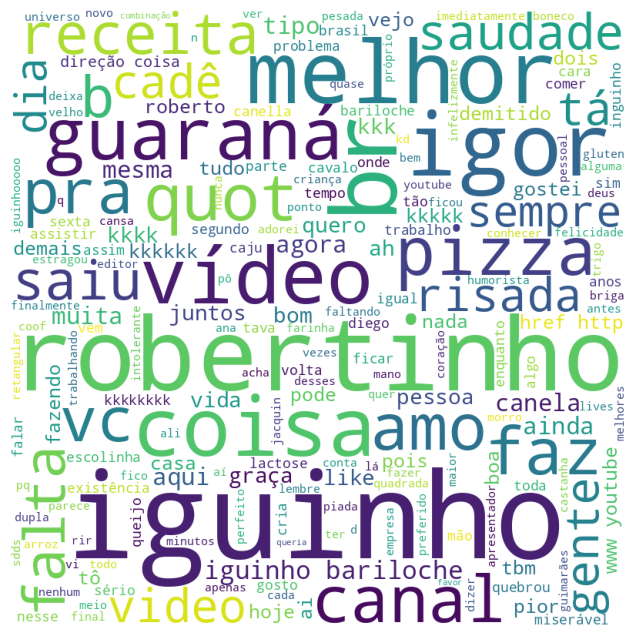

In [ ]:
!pip install wordcloud

from wordcloud import WordCloud
import matplotlib.pyplot as plt

wordcloud1 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('portuguese'),
                min_font_size = 10).generate(' '.join(words1_cleaned))

# Plot the WordCloud
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud1)
plt.axis("off")
plt.show()




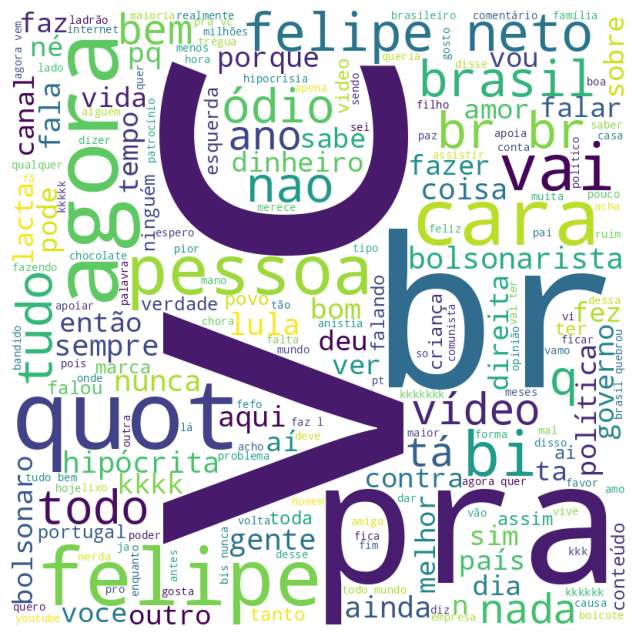

In [ ]:
wordcloud2 = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords.words('portuguese'),
                min_font_size = 10).generate(' '.join(words2_cleaned))

# Plot the WordCloud
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud2)
plt.axis("off")
plt.show()

#**Rating geral do vídeo**
###baseado nos comentários, podemos classificar o vídeo em:

| A- Muito Positivo
| B- Positivo
| C- Negativo
| D- Muito Negativo |

In [ ]:
rating_to_num = {'A': 4, 'B': 3, 'C': 2, 'D': 1}

df1_new['numeric_rating'] = df1_new['rating'].map(rating_to_num)
df2_new['numeric_rating'] = df2_new['rating'].map(rating_to_num)

# Calcular a média ponderada
weighted_avg1 = df1_new['numeric_rating'].mean()
weighted_avg2 = df2_new['numeric_rating'].mean()


# Converter a média ponderada em uma classificação
def convert_to_rating(value):
    if value >= 3.5:
        return 'A'
    elif 2.5 <= value < 3.5:
        return 'B'
    elif 1.85 <= value < 2.5:
        return 'C'
    else:
        return 'D'

video_rating1 = convert_to_rating(weighted_avg1)
video_rating2 = convert_to_rating(weighted_avg2)

print(f'O rating total do vídeo 1 é: {video_rating1}')
print(f'O rating total do vídeo 2 é: {video_rating2}')

O rating total do vídeo 1 é: B
O rating total do vídeo 2 é: D


#**Conclusão:**

##Baseado em nossa análise, o vídeo patrocinado pelo Guaraná Antartica teve o **rating total "B"**, que significa um **retorno positivo**.
##Enquanto o vídeo patrocinado pela Bis, trouxe o **rating total "D"**, que significa um sentimento **muito negativo** pelos espectadores.

###Também podemos gerar outros insights:

In [ ]:
filtered_row1 = df1_a_filtered.loc[df1_a_filtered['id'] == 47]
print(filtered_row1)

    id      videoId  \
46  47  cWnra1270ss   

                                                               textDisplay  \
46  meu sonho é comprar esse copo do guaraná, é lindo demaaaaaaaaaaaais!!!   

   authorDisplayName  likeCount  neg    neu    pos    comp  \
46  Laísa Brigantini          0  0.0  0.619  0.381  0.7767   

             publishedAt             updatedAt rating  
46  2023-07-18T17:53:07Z  2023-07-18T17:53:07Z      A  


###👆 Como visto no comentário acima, podemos também gerar ideias para futuras campanhas da marca.
###Por exemplo, o Guaraná Antartica poderia lançar o copo usado no programa para seus consumidores em uma ação promocional.

In [ ]:
print(f'O rating total do vídeo com Felipe Neto é: {video_rating2}')

O rating total do vídeo com Felipe Neto é: D


###Já a marca **BIS**, poderia se beneficiar de nossa análise para definir metas relacionadas a sentimentos positivos quando trabalhar com influenciadores.

###O valor pago aos influenciadores poderia ser vinculado ao índice de satisfação ("rating") alcançado pela campanha.

#**Próximos passos:**




##**1.**   Expandir a análise para outras plataformas, como Tik Tok, Instagram e Twitter.
##**2.**   Desenvolver front-end da aplicação.
##**3.**   Melhorar a acurácia do modelo de machine learning que faz a análise dos sentimentos, incluindo a identificação de ironia e sarcasmo nos comentários.
##**4.**   Criar modelos para prever antecipadamente, canais que podem trazer maior sucesso para as campanhas publicitárias.

